In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('AirPassengers.csv')

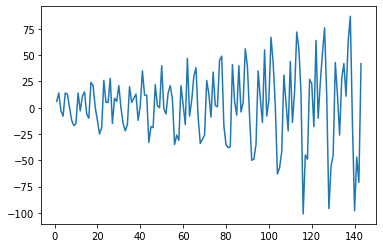

In [3]:
#differencing

train['#Passengers_diff']=train['#Passengers']-train['#Passengers'].shift(1)
train['#Passengers_diff'].dropna().plot()

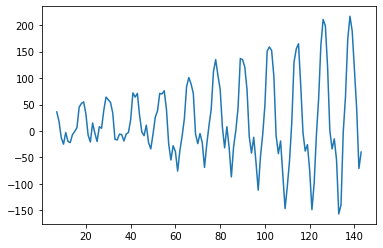

In [4]:
#seasonal differencing

n=7
train['#Passengers_diff']=train['#Passengers']-train['#Passengers'].shift(n)
train['#Passengers_diff'].dropna().plot()

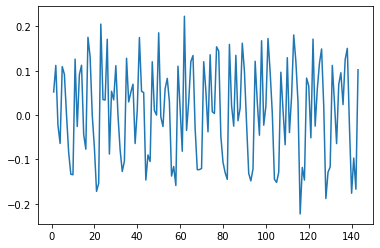

In [5]:
#transformation

#This plot is a significant improvement over the previous plots. 
#You can use square root or power transformation on the series and see if they come up with better results. 

train['#Passengers_log'] = np.log(train['#Passengers'])
train['#Passengers_log_diff'] = train['#Passengers_log'] - train['#Passengers_log'].shift(1)
train['#Passengers_log_diff'].dropna().plot()

With log transformation result: 1.581518137592078
Without transformation result: 0.3946208766114902
Without difference result: 0.0121527966037621


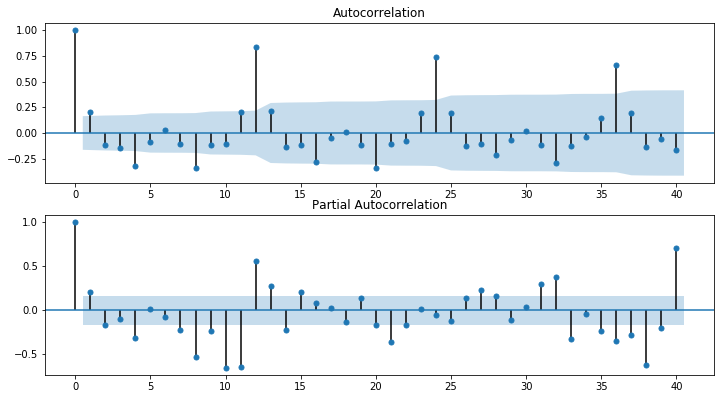

In [23]:
import statsmodels.api as sm

#The residual may be correlated in chronological order order. 
#This is called autocorrelation. 
#If this data violates independence (autocoorelation is not in non-autocorrelation), it needs to be corrected.

#durbin_watson
# d=4: negative autocorrelation
# d=2: non-autocorrelation
# d=0: possitive autocorrelation

d = sm.stats.durbin_watson(train['#Passengers_log_diff'].dropna())
print("With log transformation result:",d)

d = sm.stats.durbin_watson(train['#Passengers_diff'].dropna())
print("Without transformation result:",d)

d = sm.stats.durbin_watson(train['#Passengers'].dropna())
print("Without difference result:",d)


#acf & pacf
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(train['#Passengers_log_diff'].dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(train['#Passengers_log_diff'].dropna(), lags=40, ax=ax2)

C:\ProgramData\Anaconda3\envs\FB\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


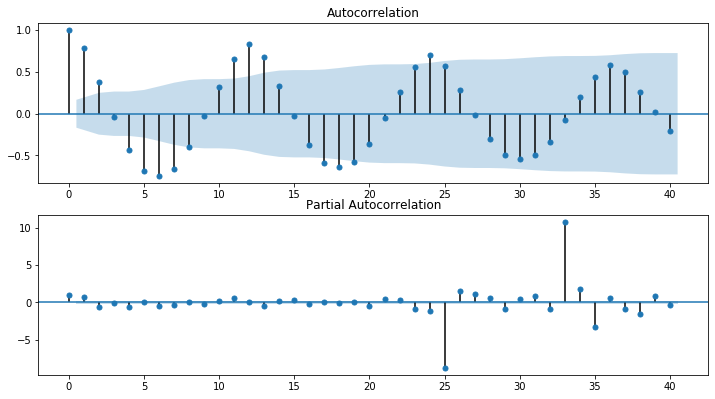

In [17]:
#without transformation

#acf & pacf
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(train['#Passengers_diff'].dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(312)
fig = sm.graphics.tsa.plot_pacf(train['#Passengers_diff'].dropna(), lags=40, ax=ax2)

In [28]:
#Ljung box test (Q test)
r, q, p = sm.tsa.acf(train['#Passengers_log_diff'].dropna(), qstat=True)
data = np.c_[range(1, 41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', 'AC', 'Q', 'Prob(>Q)'])
# Prob(>Q) < 0.05, the data is autocorrelation
print(table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.199751    5.826330  1.578803e-02
2.0  -0.120104    7.947631  1.880156e-02
3.0  -0.150772   11.314433  1.014164e-02
4.0  -0.322074   26.788392  2.193623e-05
5.0  -0.083975   27.847938  3.897653e-05
6.0   0.025778   27.948515  9.608381e-05
7.0  -0.110961   29.825686  1.022107e-04
8.0  -0.336721   47.240220  1.379867e-07
9.0  -0.115586   49.307560  1.453371e-07
10.0 -0.109267   51.168922  1.625446e-07
11.0  0.205852   57.825350  2.343718e-08
12.0  0.841430  169.890017  5.027768e-30
13.0  0.215087  177.268875  6.118314e-31
14.0 -0.139554  180.399266  5.373156e-31
15.0 -0.115996  182.578873  7.174604e-31
16.0 -0.278943  195.282589  7.110087e-33
17.0 -0.051706  195.722559  2.070203e-32
18.0  0.012458  195.748304  7.083253e-32
19.0 -0.114358  197.935121  8.761342e-32
20.0 -0.337174  217.100088  4.522978e-35
21.0 -0.107385  219.059974  6.193808e-35
22.0 -0.075211  220.029330  1.309010e-34
23.0  0.199475  

C:\ProgramData\Anaconda3\envs\FB\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\ProgramData\Anaconda3\envs\FB\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
